In [1]:
import numpy as np
import pysal as ps
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from pandas.stats.api import ols
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
from matplotlib.pyplot import *
import random

# Examples of spatial autocorrelation

Put numbers from 1 to 100 on a rectangular grid - first in a sequential order, next - in a random one. Same numbers but a completely different pattern.

In [2]:
X = np.arange(100)
X.shape = (10, 10)

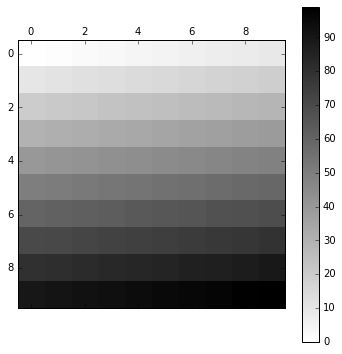

In [3]:
matshow(X, cmap=cm.gray_r)
colorbar()

In [4]:
np.random.seed(2015)
X = np.arange(100)
np.random.shuffle(X)
X.shape = (10, 10)

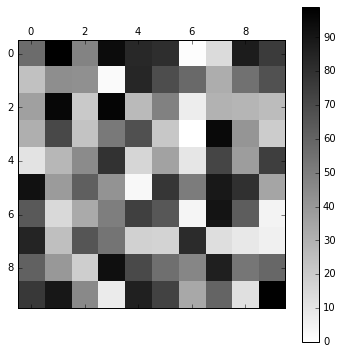

In [5]:
matshow(X, cmap=cm.gray_r)
colorbar()

In the first case all darker spots are nearby as well as all the brighter spots, in the second they are randomly mixed. How can we quantify this effect? Before consider another example.

## Example 1. Consider random values $X$ distributed over the rectangular grid and apply smoothering transform

In [6]:
np.random.seed(2015)
X=np.random.normal(loc=0,scale=1,size=(10,10))

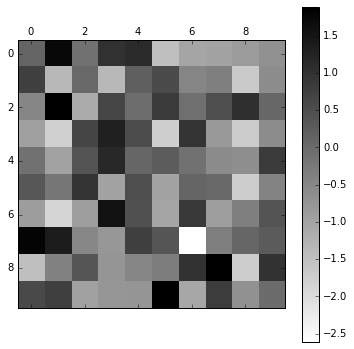

In [7]:
matshow(X, cmap=cm.gray_r)
colorbar()
Example1X1=X

In [8]:
#apply a smoothering transform three times replacing each value by the average of itself as well as its neighbors 
for k in range(0,3):
  X1=X+0
  for i in range(0,10):
    for j in range(0,10):
      X1[i,j]+=X[i-1+10*(i==0),j]
      X1[i,j]+=X[i+1-10*(i==9),j]
      X1[i,j]+=X[i,j-1+10*(j==0)]
      X1[i,j]+=X[i,j+1-10*(j==9)]
      X1[i,j]/=5  
  X=X1+0     

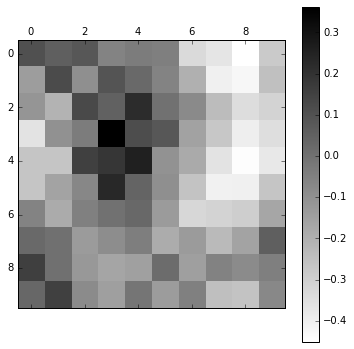

In [9]:
#now the pattern looks much less random even though it is still built based on random numbers
Example1X2=X
matshow(Example1X2, cmap=cm.gray_r)
colorbar()

Again we observe this effect of clustering for darker/brighter spots even though the origin of the data was completely random. We can quantify this clustering if we look at the correlation between the neighbor values. But what are the neigbors? Assume that there is a certain network of weighed neighbor relations between the cells, defined through a weighted adjucency matrix $w_{i,j}$. Weights could be binary or real-valued (usually between 0 and 1). Most commonly used binary schemes on a rectangular grid are "Rook", "Bishop" and "Queen" according to the possible moves of the corresponding chess pieces.

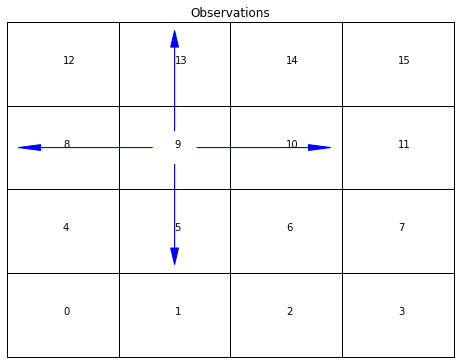

In [10]:
#Rook case
xs = np.array(list(range(4)) * 4).flatten()
ys = np.array([[i] * 4 for i in range(4)]).flatten()
f = figure()
ax = f.add_subplot(111)
ax.arrow(1, 1.8, -0, -1, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(1, 2.2, -0, 1, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(0.8, 2, -1, 0, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(1.2, 2, 1, 0, fc="b", ec="b", head_width=0.07, head_length=0.2)


scatter(xs, ys, marker='', color='k')
for i in range(4):
    axvline(i+0.5, color='k')
    axhline(i+0.5, color='k')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_xlim((-0.5, 3.5))
ax.set_ylim((-0.5, 3.5))
for i in range(16):
    text(xs[i], ys[i], str(i))
title("Observations")

In [11]:
#Let's check neighbor list that way for all id.numbers
w = ps.lat2W(4, 4)
w.neighbors

{0: [4, 1],
 1: [0, 5, 2],
 2: [1, 6, 3],
 3: [2, 7],
 4: [0, 8, 5],
 5: [1, 4, 9, 6],
 6: [2, 5, 10, 7],
 7: [3, 6, 11],
 8: [4, 12, 9],
 9: [5, 8, 13, 10],
 10: [6, 9, 14, 11],
 11: [7, 10, 15],
 12: [8, 13],
 13: [9, 12, 14],
 14: [10, 13, 15],
 15: [11, 14]}

In [12]:
print(w.full()[0])

[[ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0. 

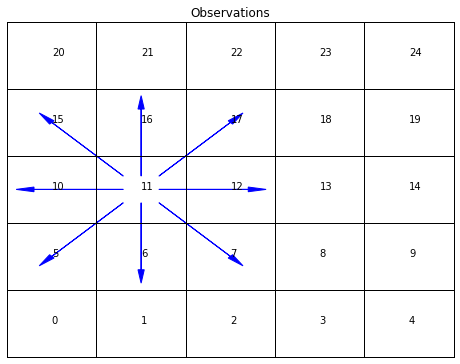

In [13]:
#Queen case
xs = np.array(list(range(5)) * 5).flatten()
ys = np.array([[i] * 5 for i in range(5)]).flatten()
f = figure()
ax = f.add_subplot(111)
ax.arrow(1, 1.8, -0, -1, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(1, 2.2, -0, 1, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(0.8, 2, -1, 0, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(1.2, 2, 1, 0, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(1.2, 2.2, 0.8, 0.8, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(0.8, 2.2, -0.8, 0.8, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(1.2, 1.8, 0.8, -0.8, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(0.8, 1.8, -0.8, -0.8, fc="b", ec="b", head_width=0.07, head_length=0.2)

scatter(xs, ys, marker='', color='k')
for i in range(5):
    axvline(i+0.5, color='k')
    axhline(i+0.5, color='k')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_xlim((-0.5, 4.5))
ax.set_ylim((-0.5, 4.5))
for i in range(25):
    text(xs[i], ys[i], str(i))
title("Observations")

In [14]:
#Let's check neighbor list that way for all id.numbers - queen case
w = ps.lat2W(5, 5, rook=False)
w.neighbors

{0: [5, 1, 6],
 1: [0, 6, 2, 7, 5],
 2: [1, 7, 3, 8, 6],
 3: [2, 8, 4, 9, 7],
 4: [3, 9, 8],
 5: [0, 1, 10, 6, 11],
 6: [0, 1, 2, 5, 11, 7, 12, 10],
 7: [1, 2, 3, 6, 12, 8, 13, 11],
 8: [2, 3, 4, 7, 13, 9, 14, 12],
 9: [3, 4, 8, 14, 13],
 10: [5, 6, 15, 11, 16],
 11: [5, 6, 7, 10, 16, 12, 17, 15],
 12: [6, 7, 8, 11, 17, 13, 18, 16],
 13: [7, 8, 9, 12, 18, 14, 19, 17],
 14: [8, 9, 13, 19, 18],
 15: [10, 11, 20, 16, 21],
 16: [10, 11, 12, 15, 21, 17, 22, 20],
 17: [11, 12, 13, 16, 22, 18, 23, 21],
 18: [12, 13, 14, 17, 23, 19, 24, 22],
 19: [13, 14, 18, 24, 23],
 20: [15, 16, 21],
 21: [15, 16, 17, 20, 22],
 22: [16, 17, 18, 21, 23],
 23: [17, 18, 19, 22, 24],
 24: [18, 19, 23]}

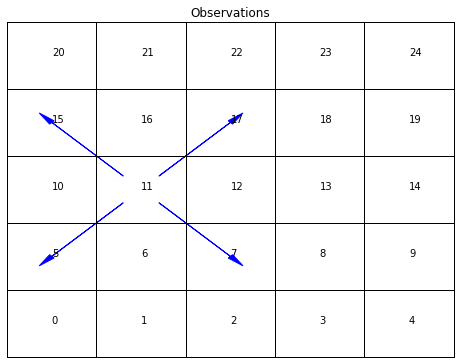

In [15]:
#Bishop case
xs = np.array(list(range(5)) * 5).flatten()
ys = np.array([[i] * 5 for i in range(5)]).flatten()
f = figure()
ax = f.add_subplot(111)

ax.arrow(1.2, 2.2, 0.8, 0.8, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(0.8, 2.2, -0.8, 0.8, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(1.2, 1.8, 0.8, -0.8, fc="b", ec="b", head_width=0.07, head_length=0.2)
ax.arrow(0.8, 1.8, -0.8, -0.8, fc="b", ec="b", head_width=0.07, head_length=0.2)

scatter(xs, ys, marker='', color='k')
for i in range(5):
    axvline(i+0.5, color='k')
    axhline(i+0.5, color='k')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_xlim((-0.5, 4.5))
ax.set_ylim((-0.5, 4.5))
for i in range(25):
    text(xs[i], ys[i], str(i))
title("Observations")


In [16]:
#Let's check neighbor list that way for all id.numbers
w1 = ps.lat2W(5, 5, rook=False)
w2 = ps.lat2W(5, 5, rook=True)
w = ps.weights.w_difference(w1, w2, constrained=False)
w.neighbors

{0: [6],
 1: [5, 7],
 2: [8, 6],
 3: [9, 7],
 4: [8],
 5: [1, 11],
 6: [0, 2, 12, 10],
 7: [11, 1, 3, 13],
 8: [12, 2, 4, 14],
 9: [3, 13],
 10: [16, 6],
 11: [17, 15, 5, 7],
 12: [8, 16, 18, 6],
 13: [9, 19, 17, 7],
 14: [8, 18],
 15: [11, 21],
 16: [20, 10, 12, 22],
 17: [23, 11, 13, 21],
 18: [24, 12, 22, 14],
 19: [13, 23],
 20: [16],
 21: [17, 15],
 22: [16, 18],
 23: [17, 19],
 24: [18]}

Now, once the neighor weights $w_{i,j}$ are selected for each pair of $i,j$ on a two- or multidimensional grid, consider an array of values $X_i$ corresponding to each cell $i$. Compute their sample mean and variance"
$$
\mu=\frac{\sum\limits_i X_i}{N},
$$$$
\sigma^2=\frac{\sum\limits_i (X_i-\mu)^2}{N}.
$$

Then one of the quantities, characterizing existing spatial autocorrelation - Moran I - could be defined as: 
$$
I=\frac{\sum\limits_{i,j}w_{i,j}(X_i-\mu)(X_j-\mu)}{\sigma^2\left(\sum\limits_{i,j}w_{i,j}\right)}
$$

In [17]:
#Now consider the value of Moran I for both version of X in the Example 1
ps.Moran(Example1X1.flatten(),w = ps.lat2W(10, 10)).I

-0.16500223444008691

In [18]:
ps.Moran(Example1X2.flatten(),w = ps.lat2W(10, 10)).I

0.67940421738804269

In [19]:
ps.Moran(Example1X2.flatten(),w = ps.lat2W(10, 10, rook = False)).I

0.68799255876099685

Another possility to assign weights $w_ij$ is by using a K-nearest neighbor approach: set $w_{i,j}=1$ is $j$ is one of the $k$ nearest neighbors of $i$ and $w_{i,j}=0$ - otherwise.

In [20]:
x,y=np.indices((5,5))
x.shape=(25,1)
y.shape=(25,1)
data=np.hstack([x,y])

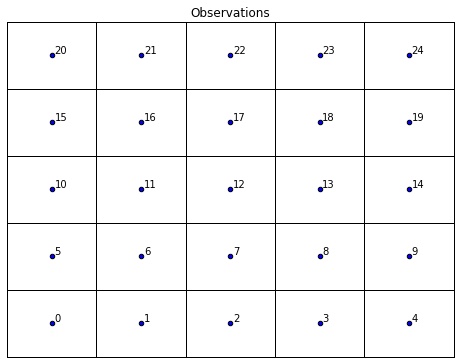

In [21]:
xs = np.array(list(range(5)) * 5).flatten()
ys = np.array([[i] * 5 for i in range(5)]).flatten()
f = figure()
ax = f.add_subplot(111)

scatter(xs, ys, marker='', color='k')
for i in range(5):
    axvline(i+0.5, color='k')
    axhline(i+0.5, color='k')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.scatter(data[:, 0], data[:, 1])
ax.set_xlim((-0.5, 4.5))
ax.set_ylim((-0.5, 4.5))
for i in range(25):
    text(xs[i]+0.03, ys[i]+0.03, str(i))
title("Observations")

In [22]:
# it can also 
tree = ps.cg.kdtree.KDTree(np.array(data))
wknn4 = ps.knnW(tree, k = 4)

In [23]:
wknn4.neighbors

{0: [1, 5, 6, 2],
 1: [2, 0, 6, 5],
 2: [1, 3, 7, 6],
 3: [2, 4, 8, 7],
 4: [3, 9, 8, 2],
 5: [6, 0, 10, 1],
 6: [5, 1, 11, 7],
 7: [2, 6, 12, 8],
 8: [7, 3, 13, 9],
 9: [8, 4, 14, 3],
 10: [11, 15, 5, 16],
 11: [10, 16, 12, 6],
 12: [13, 17, 11, 7],
 13: [18, 14, 8, 12],
 14: [13, 19, 9, 8],
 15: [16, 20, 10, 21],
 16: [21, 11, 17, 15],
 17: [18, 12, 16, 22],
 18: [17, 19, 23, 13],
 19: [18, 14, 24, 23],
 20: [21, 15, 16, 10],
 21: [16, 20, 22, 17],
 22: [23, 17, 21, 18],
 23: [18, 22, 24, 19],
 24: [23, 19, 18, 14]}

In [24]:
x,y=np.indices((10,10))
x.shape=(100,1)
y.shape=(100,1)
data=np.hstack([x,y])
tree = ps.cg.kdtree.KDTree(np.array(data))
wknn10 = ps.knnW(tree, k = 10)
ps.Moran(Example1X2.flatten(),w = wknn10).I

0.59413477162488115

Alternatively instead of picking up several closest neighbors the weights $w_{i,j}$ might be assigned in a more homogenous manner depending on the distance between the two cells $i,j$. Specifically one can assing different real-valued weights for all of them in inverse proportion to the distance (or square distance) from the considered cell. Just need to normalize the weights making sure that for each cell the total weight of all neighbors is the same:
$$
w_{i,j}=\frac{d_{i,j}^{-q}}{\sum_{k\neq i} d_{i,k}^{-q}},
$$
where $q=1,2$ or other power.

## Example 2. Moran I for Baltimore's housing price

with respect to weighted w decaying with distance

In [25]:
#(1) Baltimore housing data 
#The data is linked with shapefile data. 

#Read attributes:
db =  ps.open(ps.examples.get_path("baltim.dbf"),'r')
ds_name = "baltim.dbf"
y_name = "PRICE" #Housing price in baltimore

#Dependent variable:
y = np.array(db.by_col(y_name)).T

y.shape = (len(y),1)

#Variables: Number of rooms, number of bathrooms, Patio?, Fire place?,AC?,Garage?, Age, Lot size, Sq foot.
x_names = ["NROOM","NBATH","PATIO","FIREPL","AC","GAR","AGE","LOTSZ","SQFT"]
x = np.array([db.by_col(var) for var in x_names]).T

y: Housing Price

X: Number of rooms, Number of bathrooms, Patio, Fire place, AC, Garage, Age, Lot size, Sq foot.

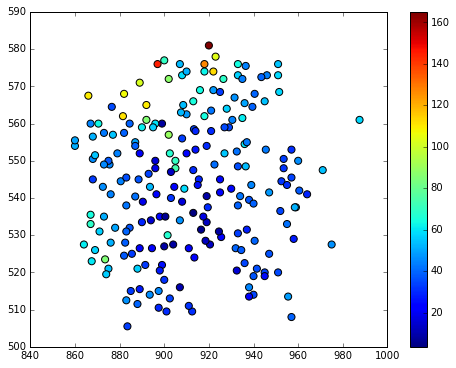

In [26]:
#Visualize the location as points
# Let's see our y.
def gen_plot_balt(y):
    import shapefile as shp
    #read shape_files
    sf_bal = shp.Reader(ps.examples.get_path("baltim.shp"))
    shapes_bal=sf_bal.shapes()
    records_bal=sf_bal.records()
    
    shape_points_bal=[]
    for i in range(len(shapes_bal)):
        shape_points_bal.append(shapes_bal[i].points[0]) #get points from shapefile
    temp=pd.DataFrame(shape_points_bal)
    import matplotlib.pyplot as plt
    plt.scatter(list(temp.loc[:, 0]), list(temp.loc[:, 1]), c=y,s=50)
    plt.colorbar();
    
gen_plot_balt(y.reshape(1,len(y)))

In [27]:
#Now le's calculate Moran's I
#Step one: get w matrix
w_knn3_baltim = ps.knnW_from_shapefile(ps.examples.get_path("baltim.shp"), k=3)
w_knn5_baltim = ps.knnW_from_shapefile(ps.examples.get_path("baltim.shp"), k=5)
w_knn10_baltim = ps.knnW_from_shapefile(ps.examples.get_path("baltim.shp"), k=10)
#Step two: calculate Moran's I
M_knn3=ps.Moran(np.array(y),w_knn3_baltim)
M_knn5=ps.Moran(np.array(y),w_knn5_baltim)
M_knn10=ps.Moran(np.array(y),w_knn10_baltim)
print ("The Moran Index we get for the prices using knn3 is: {} and p-norm is: {}".format(M_knn3.I,M_knn3.p_norm))
print ("The Moran Index we get for the prices using knn5 is: {} and p-norm is: {}".format(M_knn5.I,M_knn5.p_norm))  
print ("The Moran Index we get for the prices using knn10 is: {} and p-norm is: {}".format(M_knn10.I,M_knn5.p_norm)) 

The Moran Index we get for the prices using knn3 is: 0.540765508765 and p-norm is: 0.0
The Moran Index we get for the prices using knn5 is: 0.488603267329 and p-norm is: 0.0
The Moran Index we get for the prices using knn10 is: 0.402440868065 and p-norm is: 0.0


# Spatial regression

## Spatial error regression

Consider an output variable $y$ being modelled by means of multi-dimensional input variable $x$.
Classical assumtptions of a linear regression
$$
y=w^T x + \varepsilon
$$
include the assumption that all the errors 
$$
\varepsilon_j=y_j-w^T x_j
$$
for all the observations $x_j, y_j$ are independant identically (normally) distributed random variables with zero mean and the same variance, i.e.
$$
\varepsilon_j\sim {\cal N}(0,\sigma^2)\hspace{3ex}(1)
$$
and
$$
\forall i\neq j,\ E[\varepsilon_i\varepsilon_j]=0.\hspace{3ex}(2)
$$

However when we're predicting variables in space, the above assumption often does not hold as the errors $\varepsilon$ might be spatially autocorrelated. Imagine a following example


In [28]:
#Generate data
random.seed(111)
#generate x and random error.
x=np.asarray(random.sample(list(range(100)),25))
######
#beta for the model
beta=3
######
#with non random error term
temp = np.zeros((25,))
ids = range(0,25,2)
temp[ids] = 10
error=temp.reshape(1,25)[0]
y=x*beta+error

The Moran's I(Rook) index we get is: -0.79078 and the p-norm we get is: 0.00000. So we there is a considerable spatial correlation among the residuals.
The Moran's I(Bishop) index we get is: 0.80469 and the p-norm we get is: 0.00000. So we there is a considerable spatial correlation among the residuals.


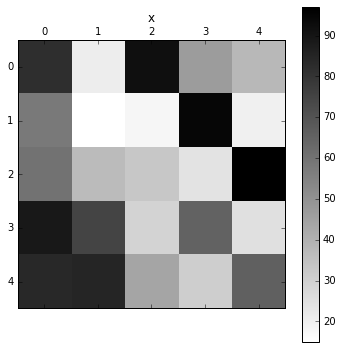

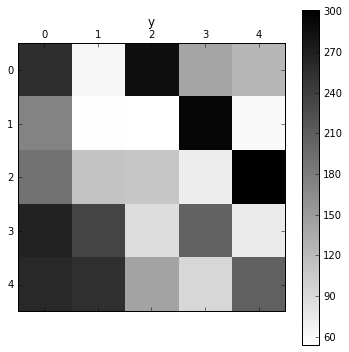

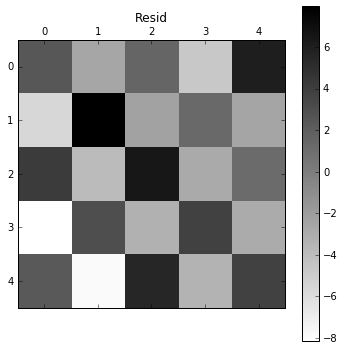

In [29]:
matshow(x.reshape(5,5), cmap=cm.gray_r)
colorbar()
plt.title('x')
# For y_rand  (With random error)
matshow(y.reshape(5,5), cmap=cm.gray_r)
colorbar()
plt.title('y')

#For resid:
result_2=ols(y=y,x=pd.DataFrame(x))
matshow(result_2.resid.reshape(5,5), cmap=cm.gray_r)
colorbar()
plt.title('Resid')

#Calculate Moran's I based on Rook. 
w=ps.lat2W(5, 5)
mor=ps.Moran(result_2.resid,w)

print("The Moran's I(Rook) index we get is: {} and the p-norm we get is: {}. So we there is a considerable spatial correlation among the residuals.".format("%.5f"%mor.I,"%.5f"%mor.p_norm))
w1 = ps.lat2W(5, 5, rook=False)
w2 = ps.lat2W(5, 5, rook=True)
w = ps.weights.w_difference(w1, w2, constrained=False)
mor=ps.Moran(result_2.resid,w)
print("The Moran's I(Bishop) index we get is: {} and the p-norm we get is: {}. So we there is a considerable spatial correlation among the residuals.".format("%.5f"%mor.I,"%.5f"%mor.p_norm))

In [30]:
result_2


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <0> + <intercept>

Number of Observations:         25
Number of Degrees of Freedom:   2

R-squared:         0.9972
Adj R-squared:     0.9971

Rmse:              4.6456

F-stat (1, 23):  8224.4722, p-value:     0.0000

Degrees of Freedom: model 1, resid 23

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             0     3.0827     0.0340      90.69     0.0000     3.0160     3.1493
     intercept     0.8023     2.0331       0.39     0.6968    -3.1826     4.7871
---------------------------------End of Summary---------------------------------

So if for the available training dataset $Y,X$ and the estimate $y\sim w^T x$, the error vector
$$
\varepsilon=Y-X w
$$
demonstrates significant autocorrelation (say having Moran I way above $0$), the OLS regression estimate may not be consistent, as the assumptions of the OLS regression are violated.

Instead one could consider a regression with spatial correlated errors, called spatial error regression:
$$
Y=X w+u,\hspace{3ex}(3)
$$$$
u=\lambda W u+\varepsilon,\hspace{3ex}(4)
$$
where components of $\varepsilon$ are independent normally distributed random variables following conditions (1)-(2), while error term $u$ admits spatial autocorrelation, controlled by the term $\lambda W u$, where $W$ as before is the given spatial lag matrix, defining arbitrary weights of neighbor relations and the constant $\lambda$ is responsible for the strength of the spatial autocorrelation. 

As OLS estimate for the above regression does not make much sense as $u$ does not follow (1)-(2), so we need to get back to its origins, considering max-likelihood approach with respect to the conditions (1)-(2) for $\varepsilon$.

One can rewrite (3)-(4) as
$$
Y=X w +(I_N-\lambda W)^{-1}\varepsilon,
$$
where $N$ is the size of the training sample and $I_N$ is the identity $N\times N$ matrix. The the log-likelihood of getting the observed $Y$ out of $X$ can be written as
$$
L=\sum\limits_j ln (1-\lambda \omega_j)-\frac{N}{2}ln(2\pi)-N ln \sigma-\frac{(Y-X w)'(Y-\lambda W Y)'(Y-X w)}{2\sigma^2},
$$
where $\omega_j$ are eigenvalues of $W$. Now finding the unknown parameters $\lambda$ and $w$ is subject to solving the optimization problem $L\to\max$.

In [31]:
#Let's run Spatial Error Model. (SEM)
res_Spatial_error=ps.spreg.ML_Error(y.reshape(25,1),x.reshape(25,1),w=w)
print res_Spatial_error.summary

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          25
Mean dependent var  :    164.8000                Number of Variables   :           2
S.D. dependent var  :     86.1177                Degrees of Freedom    :          23
Pseudo R-squared    :      0.9972
Sigma-square ML     :       0.000                Log likelihood        :     262.909
S.E of regression   :       0.000                Akaike info criterion :    -521.818
                                                 Schwarz criterion     :    -519.380

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/optimize/_minimize.py:570: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


## Spatial lag regression
An alternative option is to account for the spatial autocorrelation first, directly for the output variable:
$$
Y=\rho W Y + X \beta+\varepsilon. (5)
$$
This way we can keep classic assumptions (1)-(2) for the errors $\varepsilon_j$ considering them independent, as the correlations are already taken care of. This model is callse spatial lag regression. The log-likelihood for it will take form:
$$
L=\sum\limits_j ln (1-\rho \omega_j)-\frac{N}{2}ln(2\pi)-N ln \sigma-\frac{(Y-\rho W Y-X w)'(Y-\rho W Y-X w)}{2\sigma^2}.
$$
Again estimates for $\rho$ and $w$ are now subject to maximizing $L\to\max$. In case $\rho$ is fixed, after dropping constants this problem start being pretty similar to OLS:
$$
N ln \sigma+\frac{\sum_j \varepsilon_j^2}{2\sigma^2}\to\min.
$$
However, worth mentioning that $\sum_j \varepsilon_j^2$ is no longer connected with $R^2$ as $\varepsilon$ are not the errors for $Y$ but for the lagged variable $Y-\rho WY$. Also the general case when we need to tune $\rho$ is more sophisticated. 

In [32]:
# Run Spatial Lag model (SLM)
res_Spatial_lag=ps.spreg.ML_Lag(y.reshape(25,1),x.reshape(25,1),w=w)
print res_Spatial_lag.summary

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          25
Mean dependent var  :    164.8000                Number of Variables   :           3
S.D. dependent var  :     86.1177                Degrees of Freedom    :          22
Pseudo R-squared    :      0.9982
Spatial Pseudo R-squared:  0.9981
Sigma-square ML     :      12.597                Log likelihood        :     -67.151
S.E of regression   :       3.549                Akaike info criterion :     140.302
                                                 Schwarz criterion     :     143.958

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [33]:
# Let's run OLS with spatial diagnatiscs
res_ols=ps.spreg.ols.OLS(y.reshape(25,1),x.reshape(25,1),w=w,spat_diag=True,moran=True)
print res_ols.summary

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          25
Mean dependent var  :    164.8000                Number of Variables   :           2
S.D. dependent var  :     86.1177                Degrees of Freedom    :          23
R-squared           :      0.9972
Adjusted R-squared  :      0.9971
Sum squared residual:     496.367                F-statistic           :   8224.4722
Sigma-square        :      21.581                Prob(F-statistic)     :   6.904e-31
S.E. of regression  :       4.646                Log likelihood        :     -72.829
Sigma-square ML     :      19.855                Akaike info criterion :     149.658
S.E of regression ML:      4.4559                Schwarz criterion     :     152.096

-----------------------------------------------------------------------------

From Diagnostics report, we see Moran's I is the same as we calculated before. 
Robust LM(lag) has higher p-value, which means we should consider SEM - indeed we saw a better fit from it

In [34]:
# We see both coefficient are significant in these two models and let' see the coefficients:
#Compare the results between three models.
res_compare=pd.DataFrame([list(result_2.beta)[::-1],
                          list(res_Spatial_error.betas)[:-1],
                          list(res_Spatial_lag.betas)[:-1]]).T

res_compare.columns=['OLS','SEM','SLM']
res_compare.index=['Const','Beta']
res_compare

,OLS,SEM,SLM
Const,0.8022701,[5.20522395149],[-4.13833414242]
Beta,3.082664,[2.9999999993],[3.0434945703]


In [35]:
# Remember our real beta is 3. So both - OLS and SLM gave a biased answer here.

## Example 3. Crime in Columbus (Ohio)

In [36]:
#Get data:
db_columbus = ps.open(ps.examples.get_path("columbus.dbf"),'r')

#Generate y: Crime
y = np.array(db_columbus.by_col("CRIME"))
y = np.reshape(y, (49,1))

#variable x: Income
X = []
X.append(db_columbus.by_col("INC")) #income
#X.append(db_columbus.by_col("HOVAL")) # Home Value
X = np.array(X).T

X: INC 	household income (in $1,000)

y: CRIME 	residential burglaries and vehicle thefts per 1000 households

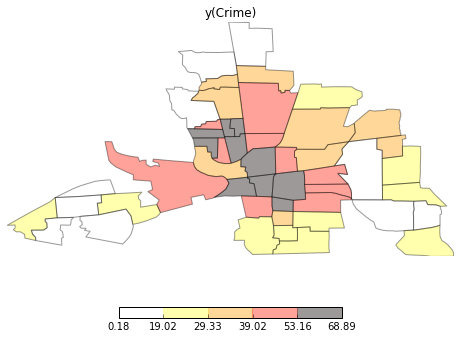

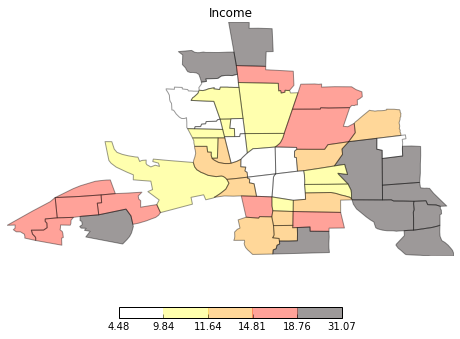

In [37]:
#Visulize for y (Crime)
from pysal.contrib.viz import mapping as maps
#types = ['classless', 'unique_values', 'quantiles', 'fisher_jenks', 'equal_interval']
maps.plot_choropleth(ps.examples.get_path('columbus.shp'), y.reshape(1,49)[0], 'quantiles', title='y(Crime)')
#Visulize X. Income
maps.plot_choropleth(ps.examples.get_path('columbus.shp'), X.reshape(1,49)[0], 'quantiles', title='Income')

In [38]:
#Step one: define w matrix:

#(1) Rook
w_rook_columbus = ps.rook_from_shapefile(ps.examples.get_path("columbus.shp"))

#(2)Queen
w_queen_columbus=ps.queen_from_shapefile(ps.examples.get_path("columbus.shp"))

#(3) 3-Nearest
w_knn3_columbus = ps.knnW_from_shapefile(ps.examples.get_path("columbus.shp"), k=3)

#here we choose knn3

#### Run OLS and report the diagnostics (Includes the Moran's I) 

In [39]:
#Step two: Run OLS and diagnostics report:
res_ols_columbus =ps.spreg.ols.OLS(y,X,w=w_knn3_columbus,name_y='Crime',name_x=['Inc'],name_w='knn3',name_ds='Columbus',spat_diag=True,moran=True) 
print res_ols_columbus.summary

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :    Columbus
Weights matrix      :        knn3
Dependent Variable  :       Crime                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           2
S.D. dependent var  :     16.7321                Degrees of Freedom    :          47
R-squared           :      0.4838
Adjusted R-squared  :      0.4729
Sum squared residual:    6936.202                F-statistic           :     44.0579
Sigma-square        :     147.579                Prob(F-statistic)     :   2.901e-08
S.E. of regression  :      12.148                Log likelihood        :    -190.869
Sigma-square ML     :     141.555                Akaike info criterion :     385.738
S.E of regression ML:     11.8977                Schwarz criterion     :     389.521

-----------------------------------------------------------------------------

The result of Moran's I we get is 0.303463434011, and p norm is:0.00103175853328. So we should accept that we have spatial autocorelation


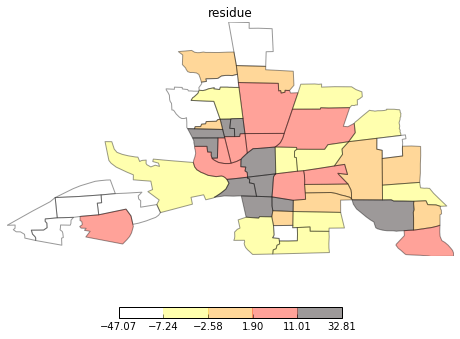

In [40]:
# The result of Moran's I on Spatial Autocorelation.
print "The result of Moran's I we get is {}, and p norm is:{}. So we should accept that we have spatial autocorelation".format(
    res_ols_columbus.moran_res[0],res_ols_columbus.moran_res[2])

#Also let's visulize the resid:
#types = ['classless', 'unique_values', 'quantiles', 'fisher_jenks', 'equal_interval']
maps.plot_choropleth(ps.examples.get_path('columbus.shp'), res_ols_columbus.u.reshape(1,49)[0], 'quantiles', title='residue')


 From the report, we see Robust LM(error) is denied.

In [41]:
#Step three: try spatial lag model.
res_lag_columbus =ps.spreg.ML_Lag(y,X,w=w_knn3_columbus,name_y='Crime',name_x=['Inc'],name_w='knn3',name_ds='Columbus') 
print res_lag_columbus.summary

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :    Columbus
Weights matrix      :        knn3
Dependent Variable  :       Crime                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           3
S.D. dependent var  :     16.7321                Degrees of Freedom    :          46
Pseudo R-squared    :      0.6237
Spatial Pseudo R-squared:  0.5286
Sigma-square ML     :     103.465                Log likelihood        :    -184.552
S.E of regression   :      10.172                Akaike info criterion :     375.105
                                                 Schwarz criterion     :     380.780

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [42]:
#*If we ignore the diagnostics report and run spatial error model anyway:
res_err_columbus =ps.spreg.ML_Error(y,X,w=w_knn3_columbus,name_y='Crime',name_x=['Inc'],name_w='knn3',name_ds='Columbus',) 
print res_err_columbus.summary

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :    Columbus
Weights matrix      :        knn3
Dependent Variable  :       Crime                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           2
S.D. dependent var  :     16.7321                Degrees of Freedom    :          47
Pseudo R-squared    :      0.4838
Sigma-square ML     :     106.486                Log likelihood        :    -186.018
S.E of regression   :      10.319                Akaike info criterion :     376.036
                                                 Schwarz criterion     :     379.819

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [43]:
# Let's compare the results(Coefficients):
#Compare the results between three models.
res_compare_bal=pd.DataFrame([list(res_ols_columbus.betas),
                          list(res_err_columbus.betas)[:-1],
                          list(res_lag_columbus.betas)[:-1]]).T

res_compare_bal.columns=['ols','error','lag']
res_compare_bal.index=['Const','Beta']
res_compare_bal

,ols,error,lag
Const,[64.4632283284],[55.6438882665],[39.7080769338]
Beta,[-2.04066291552],[-1.48231372125],[-1.43661569279]


In [44]:
#Let's calculate R2 for these three models over the entire sample:
#w_type: 1)knn_3,2)knn_5 3)Rook, 4) Queen 

def R_2_test_Ols_Err_Lag(y,X,shp_link,w_type):
    
    from pandas.stats.api import ols

    result_ols=ols(y=y.reshape(1,len(X))[0],x=pd.DataFrame(X))

    R_2_is_ols=result_ols.r2
    print("(IS) R2 for OLS is: {}".format(R_2_is_ols))

    # ############################################################################
    #Spatial Error model:y=Xb+(I-lambda*W)^-1 v  . So we only need coefficient to calculate y. This situation is simple.
    
    if w_type==1:
        w = ps.knnW_from_shapefile(shp_link, k=3)
    elif w_type==2:
        w = ps.knnW_from_shapefile(shp_link, k=5)
    elif w_type==3:
        w=ps.rook_from_shapefile(shp_link)
    elif w_type==4:
        w=ps.queen_from_shapefile(shp_link)
    
    result_err= ps.spreg.ML_Error(y,X,w=w) 


    a=np.array(X)
    b=result_err.betas.reshape(1,len(result_err.betas))[0]

    #IS
    d=result_err.predy.reshape(1,len(result_err.predy))[0]
    error=d-y.reshape(1,len(X))[0]
    R_2_is_err=1-error.var()/y.reshape(1,len(X))[0].var()

    print("(IS)R2 for SEM is: {};".format(R_2_is_err))

    ##################################################################################
    #Spatial Lag model. y=(1-lambda*W)^(-1)(Xb+c)
    result_lag= ps.spreg.ML_Lag(y,X,w=w) 


    #IS
    d=result_lag.predy.reshape(1,len(result_lag.predy))[0]
    error=d-y.reshape(1,len(X))[0]
    R_2_is_lag=1-error.var()/y.reshape(1,len(X))[0].var()

    print("(IS)R2 for SLM is: {}".format(R_2_is_lag))

In [45]:
shp_link=ps.examples.get_path("columbus.shp")
print "k-3"
R_2_test_Ols_Err_Lag(y,X,shp_link,w_type=1)
print "\nk5"
R_2_test_Ols_Err_Lag(y,X,shp_link,w_type=2)
print "\nrook"
R_2_test_Ols_Err_Lag(y,X,shp_link,w_type=3)
print "\nqueen"
R_2_test_Ols_Err_Lag(y,X,shp_link,w_type=4)

k-3
(IS) R2 for OLS is: 0.48384513294
(IS)R2 for SEM is: 0.447622866573;
(IS)R2 for SLM is: 0.622734705297

k5
(IS) R2 for OLS is: 0.48384513294
(IS)R2 for SEM is: 0.441249042065;
(IS)R2 for SLM is: 0.623326351316

rook
(IS) R2 for OLS is: 0.48384513294
(IS)R2 for SEM is: 0.40510703071;
(IS)R2 for SLM is: 0.585092706277

queen
(IS) R2 for OLS is: 0.48384513294
(IS)R2 for SEM is: 0.44366967207;
(IS)R2 for SLM is: 0.593303152256


# Example 4. New York City Income vs education

In [46]:
#(1)Get all data from file Demographic_2014.csv:
def get_data_for_Demo():
    
    Demographic=pd.read_csv("Demographic_2014.csv", low_memory=False)
    variable_names=list(Demographic.iloc[0,:])
    #first row is variable name
    Demographic=Demographic.iloc[1:,:]
    Demographic.index=range(len(Demographic))
    
    #Get zipcode from "Name of Area"
    zipcode=pd.DataFrame([int(Demographic.loc[i,'Name of Area'].split(" ")[0]) for i in range(len(Demographic))])
    Demographic.columns=variable_names
    Demographic=pd.concat((zipcode,Demographic),axis=1)
    Demographic=Demographic.rename(columns={0:'zipcode'})
    globals()['Demo']=Demographic

get_data_for_Demo() 

In [47]:
Demo.tail()

,zipcode,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,...,SE_T146_017,SE_T146_018,SE_T146_019,SE_T146_020,SE_T146_021,SE_T146_022,SE_T146_023,SE_T146_024,SE_T146_025,SE_T146_026
33115,99923,99999923,86000US99923,99923 ZCTA5,99923 ZCTA5,us,860,0,ACSSF,43598,...,5,0,5,5,0,7,0,7,7,0
33116,99925,99999925,86000US99925,99925 ZCTA5,99925 ZCTA5,us,860,0,ACSSF,43599,...,324,144,180,47,140,109,0,109,106,34
33117,99926,99999926,86000US99926,99926 ZCTA5,99926 ZCTA5,us,860,0,ACSSF,43600,...,631,270,361,103,267,164,0,164,160,68
33118,99927,99999927,86000US99927,99927 ZCTA5,99927 ZCTA5,us,860,0,ACSSF,43601,...,108,88,20,20,0,23,0,23,23,5
33119,99929,99999929,86000US99929,99929 ZCTA5,99929 ZCTA5,us,860,0,ACSSF,43602,...,1104,345,759,177,663,576,0,576,572,403


#### We have 1256 columns(lots of interesting information here), to see details:
#### https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session7/Census_2014_feature.txt

In [48]:
# Get features we need, and deal with data issues.(nan?, int?, standarize?)
Data=Demo.loc[:,['zipcode','SE_T083_001',
                 'SE_T025_001','SE_T025_005',
                ]]
Data.columns=['zipcode','Income per capita',
              'Population over 25y','pop_bachelor',
            ]

#drop nan term
Data=Data.dropna()

#change string to integer:
Data=Data.applymap(int)

#Scalarize our data. Get the education pop ratio: 
# Bachelor/Population over 25y.
Data['Bachelor']=Data.loc[:,'pop_bachelor']/Data.loc[:,'Population over 25y']

Df_edu=Data.loc[:,['zipcode','Income per capita','Bachelor']]
Df_edu.head()

,zipcode,Income per capita,Bachelor
0,601,7229,0.136145
1,602,9048,0.160555
2,603,9888,0.149064
3,606,6385,0.098126
4,610,8197,0.102776


#### The marked following cell shows the way to get zip codes for any place of US. This is useful for people who want to play with this census data set. If you want to see the whole story below on another area(any one accross US), please use the following code, and set up State accordingly. Comment the cell after this one.

In [49]:
# State='NY' #If we want another state we can do it the following way
#########################################################################################
##read US zipcode file.
# zipcodes=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session7/us_postal_codes.csv")
# #The whole New York State zipcodes as a list.
# zipcode_NY=list(zipcodes[zipcodes['State Abbreviation']==State]['Postal Code'].apply(int))

In [50]:
#So if you want to analyze another state, change this "zipcode_NY". Use the cell above and mark this one.
#Prepare the list of NY zip codes:
import urllib2 as url
tt=url.urlopen("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session7/zipcode_NY.txt",)
temp=tt.read()
temp=temp.replace("\n","")
zipcode_NY=[int(i) for i in temp.split(", ")]  #Those are the zipcodes of our area of interest


In [51]:
#Generate the data set Df_edu_NY.
Df_edu_NY=Df_edu[Df_edu.loc[:,'zipcode'].isin(zipcode_NY)]
#Df_edu_NY=Df_edu_NY.drop(['Less_highschool','Phd'],1) 
Df_edu_NY.head()

,zipcode,Income per capita,Bachelor
2558,10001,77512,0.371203
2559,10002,26905,0.208774
2560,10003,79088,0.436064
2561,10004,98020,0.431768
2562,10005,99633,0.461035


### In order to use our package for spatial regression, we need to generate a new shapefile for our Df_edu data. 
#### To generate shape files, we need to write info of three parts: 
a. fields(claim column name, and type["variable_name","variable_type(C,N,L,D,M)", a(Field length),b(decimal length)]), 

b. records(to save features),[this part from our data: Df_edu]

c. poly/shape(to save different shape data) [this part from shapefiles:"shape_files/cb_2014_us_zcta510_500k.shp"]

more details in:
https://pypi.python.org/pypi/pyshp#reading-shapefiles

In [52]:
import shapefile as shp
#read shape_files for all zipcodes. And we need to choose the zipcodes we need later.
sf = shp.Reader("shape_files/cb_2014_us_zcta510_500k.shp")
shapes=sf.shapes() #Get all US zipcode shapes
records=sf.records() #This record saved all zipcodes w.r.t. shapes

In [53]:
#Generate the new shapefile for our zipcodes and datasets here:
#This new shapefile should be saved in a new fold "shapefile_edu_NY"
def gen_shapefile(Df_edu_NY):
    #use the function Writer, and use the same shapeType as sf, which is 15.(POLYGONZ)
    w=shp.Writer(sf.shapeType)

    #Write the field."N": number
    w.field("zipcode","N")
    w.field("Inc","N")
    w.field("Bachelor","N",50,8)
   
    
    #Gen zipcode
    zipcode=list(Df_edu_NY.loc[:,'zipcode'])
    # Generate the shapefiles
    for i in range(len(shapes)): 
        if int(records[i][0]) in zipcode: # if the zipcode(saved in recordes of sf) in our zipcodes, we need it.
            w.poly([shapes[i].points]) # write shape file
            ind=zipcode.index(int(records[i][0]))
            temp=list(Df_edu_NY.iloc[ind,:]) #get the features
            w.record(int(temp[0]),int(temp[1]),temp[2]) #write features in our file
    w.save("shapefile_edu_NY/edu_NY")

gen_shapefile(Df_edu_NY)

In [54]:
# Generate y and X

def gen_data():
    
    db_NY = ps.open('shapefile_edu_NY/edu_NY.dbf','r')

    globals()['a']=len(db_NY.read())

    #Generate y: Crime
    y = np.array(db_NY.by_col("Inc"))
    globals()['y'] = np.reshape(y, (a,1))

    #variable x: Income
    X = []
    X.append(db_NY.by_col("Bachelor")) #income
    globals()['X'] = np.array(X).T
    
gen_data()

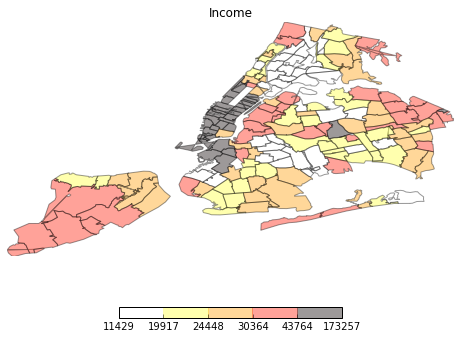

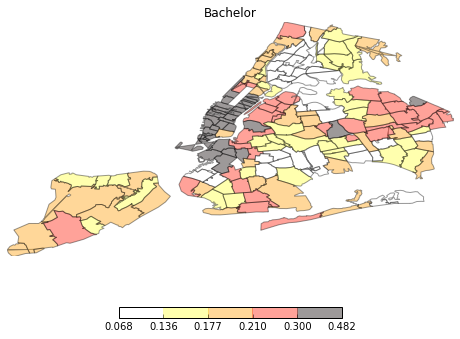

In [55]:
#Visulize for y (income per capita)
#types = ['classless', 'unique_values', 'quantiles', 'fisher_jenks', 'equal_interval']
maps.plot_choropleth('shapefile_edu_NY/edu_NY.shp', y.reshape(1,a)[0], 'quantiles', title='Income')
maps.plot_choropleth('shapefile_edu_NY/edu_NY.shp', X.reshape(1,a)[0], 'quantiles', title='Bachelor')

In [56]:
#Step one: define w matrix:

#(1) Rook
w_rook_NY = ps.rook_from_shapefile("shapefile_edu_NY/edu_NY.shp")

#(2)Queen
w_queen_NY=ps.queen_from_shapefile("shapefile_edu_NY/edu_NY.shp")

#(3) 3-Nearest
w_knn3_NY = ps.knnW_from_shapefile("shapefile_edu_NY/edu_NY.shp", k=3)

#Again, knn3 is best w.r.t. R2. You will see in the end. So we use knn3.

Island id:  [30]
Island id:  [30]


In [57]:
#Step two: Run OLS and diagnostics report:
res_ols_NY =ps.spreg.ols.OLS(y,X,w=w_knn3_NY,name_y='Inc',name_x=['Bachelor'],name_w='knn3',name_ds='NY',spat_diag=True,moran=True) 
print res_ols_NY.summary

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :          NY
Weights matrix      :        knn3
Dependent Variable  :         Inc                Number of Observations:         175
Mean dependent var  :  37776.8743                Number of Variables   :           2
S.D. dependent var  :  28371.1873                Degrees of Freedom    :         173
R-squared           :      0.7508
Adjusted R-squared  :      0.7494
Sum squared residual:34900095711.608                F-statistic           :    521.2626
Sigma-square        :201734657.293                Prob(F-statistic)     :   4.394e-54
S.E. of regression  :   14203.333                Log likelihood        :   -1920.524
Sigma-square ML     :199429118.352                Akaike info criterion :    3845.048
S.E of regression ML:  14121.9375                Schwarz criterion     :    3851.378

------------------------------------------------------------------------

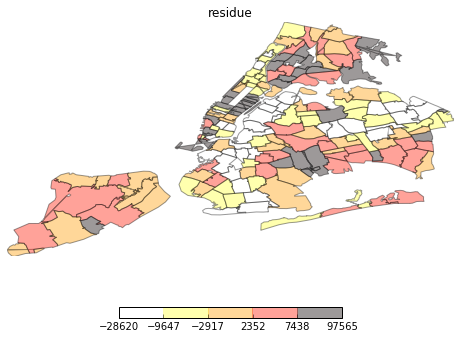

The result of Moran's I we get is 0.42418308237, and p norm is:1.59509645104e-14. So we should accept that we have spatial autocorelation


In [58]:
#visulize the residuals on map
maps.plot_choropleth('shapefile_edu_NY/edu_NY.shp', res_ols_NY.u.reshape(1,a)[0], 'quantiles', title='residue')
# The result of Moran's I on Spatial Autocorelation.
print "The result of Moran's I we get is {}, and p norm is:{}. So we should accept that we have spatial autocorelation".format(
    res_ols_NY.moran_res[0],res_ols_NY.moran_res[2])

In [59]:
#Step three: try spatial lag model.
res_lag_NY =ps.spreg.ML_Lag(y,X,w=w_knn3_NY,name_y='Inc',name_x=['Bachelor'],name_w='knn3',name_ds='NY') 
print res_lag_NY.summary

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :          NY
Weights matrix      :        knn3
Dependent Variable  :         Inc                Number of Observations:         175
Mean dependent var  :  37776.8743                Number of Variables   :           3
S.D. dependent var  :  28371.1873                Degrees of Freedom    :         172
Pseudo R-squared    :      0.8350
Spatial Pseudo R-squared:  0.7768
Sigma-square ML     :132199471.625                Log likelihood        :   -1889.745
S.E of regression   :   11497.803                Akaike info criterion :    3785.489
                                                 Schwarz criterion     :    3794.984

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
----------------------------

In [60]:
#spatial error model:
res_err_NY =ps.spreg.ML_Error(y,X,w=w_knn3_NY,name_y='Inc',name_x=['Bachelor'],name_w='knn3',name_ds='NY',) 
print res_err_NY.summary

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :          NY
Weights matrix      :        knn3
Dependent Variable  :         Inc                Number of Observations:         175
Mean dependent var  :  37776.8743                Number of Variables   :           2
S.D. dependent var  :  28371.1873                Degrees of Freedom    :         173
Pseudo R-squared    :      0.7508
Sigma-square ML     :130060227.362                Log likelihood        :   -1893.209
S.E of regression   :   11404.395                Akaike info criterion :    3790.417
                                                 Schwarz criterion     :    3796.747

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
----------------------------------------------------------

In [61]:
# Let's compare the results:
#Compare the results between three models.
res_compare_NY=pd.DataFrame([list(res_ols_NY.betas),
                          list(res_err_NY.betas)[:-1],
                          list(res_lag_NY.betas)[:-1]]).T

res_compare_NY.columns=['ols','error','lag']
res_compare_NY.index=['Const','Beta']
res_compare_NY

,ols,error,lag
Const,[-15615.1339513],[-4445.21826892],[-10274.557609]
Beta,[244694.761936],[192487.689518],[140926.673351]


In [62]:
#IS R2
shp_link='shapefile_edu_NY/edu_NY.shp'
print "k3"
R_2_test_Ols_Err_Lag(y,X,shp_link,w_type=1)

print "\nk5"
R_2_test_Ols_Err_Lag(y,X,shp_link,w_type=2)

print "\nrook"
R_2_test_Ols_Err_Lag(y,X,shp_link,w_type=3)

print "\nqueen"
R_2_test_Ols_Err_Lag(y,X,shp_link,w_type=4)

k3
(IS) R2 for OLS is: 0.750814740987
(IS)R2 for SEM is: 0.716637096676;
(IS)R2 for SLM is: 0.834817704403

k5
(IS) R2 for OLS is: 0.750814740987
(IS)R2 for SEM is: 0.705086048381;
(IS)R2 for SLM is: 0.833883288217

rook
(IS) R2 for OLS is: 0.750814740987
Island id:  [30]
(IS)R2 for SEM is: 0.745713737021;
(IS)R2 for SLM is: 0.759337715163

queen
(IS) R2 for OLS is: 0.750814740987
Island id:  [30]
(IS)R2 for SEM is: 0.743630509612;
(IS)R2 for SLM is: 0.763105774168


## Example 5 Baltimore's Housing example (Continued) 

In [63]:
#Get data again.
#(1) Baltimore housing data 
#The data is linked with shapefile data. 

#Read attributes:
db =  ps.open(ps.examples.get_path("baltim.dbf"),'r')
ds_name = "baltim.dbf"
y_name = "PRICE" #Housing price in baltimore

#Dependent variable:
y = np.array(db.by_col(y_name)).T

y.shape = (len(y),1)

#Variables: Number of rooms, number of bathrooms, Patio?, Fire place?,AC?,Garage?, Age, Lot size, Sq foot.
x_names = ["NROOM","NBATH","PATIO","FIREPL","AC","GAR","AGE","LOTSZ","SQFT"]
x = np.array([db.by_col(var) for var in x_names]).T

In [64]:
#Step one: Define w matrix.
#Since our shapefile are all points here, so we can only use K-nearest neighbors.(Rook, Queen, Bishop do not work here)

w_knn3_baltim = ps.knnW_from_shapefile(ps.examples.get_path("baltim.shp"), k=3)
w_knn5_baltim = ps.knnW_from_shapefile(ps.examples.get_path("baltim.shp"), k=5)

In [65]:
#Step two: run OLS and diagnostics report.
res_ols_baltim =ps.spreg.ols.OLS(y,x,w=w_knn3_baltim,name_y=y_name,name_x=x_names,name_w='knn3',name_ds=ds_name,spat_diag=True,moran=True) 
print res_ols_baltim.summary

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :  baltim.dbf
Weights matrix      :        knn3
Dependent Variable  :       PRICE                Number of Observations:         211
Mean dependent var  :     44.3072                Number of Variables   :          10
S.D. dependent var  :     23.6061                Degrees of Freedom    :         201
R-squared           :      0.6500
Adjusted R-squared  :      0.6343
Sum squared residual:   40960.463                F-statistic           :     41.4718
Sigma-square        :     203.783                Prob(F-statistic)     :    3.24e-41
S.E. of regression  :      14.275                Log likelihood        :    -855.223
Sigma-square ML     :     194.125                Akaike info criterion :    1730.446
S.E of regression ML:     13.9329                Schwarz criterion     :    1763.965

-----------------------------------------------------------------------------

The result of Moran's I we get is 0.110639450962, and p norm is:0.0182639335412. So we should accept that we have spatial autocorelation(but not that strong).


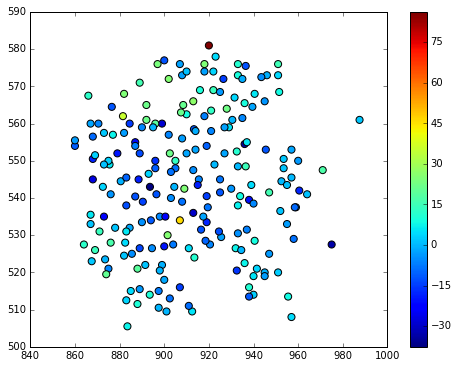

In [66]:
#Let's plot our residuals on plot.(Actually we did this above, maybe no need to show it again?)
gen_plot_balt(res_ols_baltim.u)
# The result of Moran's I on Spatial Autocorelation.
print "The result of Moran's I we get is {}, and p norm is:{}. So we should accept that we have spatial autocorelation(but not that strong).".format(
    res_ols_baltim.moran_res[0],res_ols_baltim.moran_res[2])

In [67]:
#(1) Spatial lag model:
res_slag_baltim =ps.spreg.ML_Lag(y,x,w=w_knn3_baltim,name_y=y_name,name_x=x_names,name_w='knn5',name_ds=ds_name) 
print res_slag_baltim.summary

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :  baltim.dbf
Weights matrix      :        knn5
Dependent Variable  :       PRICE                Number of Observations:         211
Mean dependent var  :     44.3072                Number of Variables   :          11
S.D. dependent var  :     23.6061                Degrees of Freedom    :         200
Pseudo R-squared    :      0.6957
Spatial Pseudo R-squared:  0.6838
Sigma-square ML     :     168.800                Log likelihood        :    -842.888
S.E of regression   :      12.992                Akaike info criterion :    1707.777
                                                 Schwarz criterion     :    1744.647

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [68]:
#Spatial Error model:
res_error_baltim =ps.spreg.ML_Error(y,x,w=w_knn3_baltim,name_y=y_name,name_x=x_names,name_w='knn5',name_ds=ds_name) 
print res_error_baltim.summary

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :  baltim.dbf
Weights matrix      :        knn5
Dependent Variable  :       PRICE                Number of Observations:         211
Mean dependent var  :     44.3072                Number of Variables   :          10
S.D. dependent var  :     23.6061                Degrees of Freedom    :         201
Pseudo R-squared    :      0.6454
Sigma-square ML     :     182.656                Log likelihood        :    -851.500
S.E of regression   :      13.515                Akaike info criterion :    1722.999
                                                 Schwarz criterion     :    1756.518

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [69]:
#Compare coefficients
compare_coe=pd.DataFrame([list(res_ols_baltim.betas),
                          list(res_slag_baltim.betas)[:-1],
                         list(res_error_baltim.betas[:-1])]).T
                        
compare_coe.columns=['OLS','Spatial Lag','Spatial Error']
compare_coe.index=['Const']+x_names
compare_coe

,OLS,Spatial Lag,Spatial Error
Const,[23.2699963406],[9.61112507762],[19.6782483487]
NROOM,[0.222493519097],[0.670200701216],[0.985531063688]
NBATH,[5.64840507321],[5.6185061392],[6.22832416584]
PATIO,[10.3358754892],[7.85413622631],[7.70147383022]
FIREPL,[11.1727276522],[9.10924946603],[9.75430987657]
AC,[7.85416373123],[7.20142817424],[6.78402780645]
GAR,[5.40206849072],[4.07036100937],[3.90559248474]
AGE,[-0.213454970695],[-0.12957638988],[-0.157885645856]
LOTSZ,[0.0949063937098],[0.0757528722101],[0.0845727799846]
SQFT,[0.187756207024],[0.123750402051],[0.141459647064]


In [70]:
#IS R2
#IS test on the whole sample
shp_link=ps.examples.get_path("baltim.shp")
print "k-3"
R_2_test_Ols_Err_Lag(y,x,shp_link,w_type=1)
print "\nk5"
R_2_test_Ols_Err_Lag(y,x,shp_link,w_type=2)

k-3
(IS) R2 for OLS is: 0.64997591207
(IS)R2 for SEM is: 0.637799645822;
(IS)R2 for SLM is: 0.695640031812

k5
(IS) R2 for OLS is: 0.64997591207
(IS)R2 for SEM is: 0.632077888688;
(IS)R2 for SLM is: 0.705907671617


In [71]:
# implementation of the out-of-sample test for OLS and spatial regression models
def os_test(X,y,shp_link,ts=0.2,w_type=1):
    
    test=int(len(X)*ts)
   
    X_test=X[:test]
    X_train=X[test:]
    Y_test=y[:test]
    Y_train=y[test:]
    


    #We need to cut our shapefile to training part and testing part as well. (Since all the regressions here are related to shapefile)
    import shapefile as shp
    sf = shp.Reader(shp_link)
    shapes=sf.shapes()
    records=sf.records()

    #write fields
    w_test=shp.Writer(sf.shapeType)
    w_train=shp.Writer(sf.shapeType)

    w_test.fields=sf.fields
    w_train.fields=sf.fields

    t=0

    #!!!y is not unique
    for i in range(len(X)):
        if list(X[i]) in np.ndarray.tolist(X_test):
            #write shape
            w_test.poly([shapes[i].points])
            #write features
            w_test.record(*records[i])
        else:
            w_train.poly([shapes[i].points])
            w_train.record(*records[i])

    w_train.save("temp/train")
    w_test.save("temp/test")

    #OLS
    from pandas.stats.api import ols

    result_ols=ols(y=Y_train.reshape(1,len(X_train))[0],x=pd.DataFrame(X_train))

    a=np.array(X_test)
    b=np.array(result_ols.beta)
    try:
        c=np.sum(a*b[0:-1],axis=1)+b[-1]
    except ValueError:
        c=a*b[0:-1]+b[-1]

    error=Y_test.reshape(1,len(X_test))[0]-c
    R_2_os_ols=1-error.var()/Y_test.reshape(1,len(X_test))[0].var()
    R_2_is_ols=result_ols.r2
    print("IS R2 for OLS is: {}; OS R2 for OLS is: {}".format(R_2_is_ols,R_2_os_ols))

    # ############################################################################
    #Spatial Error model:y=Xb+(I-lambda*W)^-1 v  . So we only need coefficient to calculate y. This situation is simple.

    if w_type==1:
        w = ps.knnW_from_shapefile("temp/train.shp", k=3)
    elif w_type==2:
        w = ps.knnW_from_shapefile("temp/train.shp", k=5)
    elif w_type==3:
        w=ps.rook_from_shapefile("temp/train.shp")
    elif w_type==4:
        w=ps.queen_from_shapefile("temp/train.shp")
    
    result_err= ps.spreg.ML_Error(Y_train,X_train,w=w) 


    a=np.array(X_test)
    b=result_err.betas.reshape(1,len(result_err.betas))[0]
    #OS
    try:
        c=np.sum(a*b[1:-1],axis=1)+b[0]
    except ValueError:
        c=a*b[1:-1]+b[0]
    error=Y_test.reshape(1,len(X_test))[0]-c
    R_2_os_err=1-error.var()/Y_test.reshape(1,len(X_test))[0].var()

    #IS

    d=result_err.predy.reshape(1,len(result_err.predy))[0]
    error=d-Y_train.reshape(1,len(X_train))[0]
    R_2_is_err=1-error.var()/Y_train.reshape(1,len(X_train))[0].var()

    print("IS R2 for SEM is: {}; OS R2 for SEM is:{}".format(R_2_is_err,R_2_os_err))

    ##################################################################################
    #Spatial Lag model. y=(1-lambda*W)^(-1)(Xb+c)
    result_lag= ps.spreg.ML_Lag(Y_train,X_train,w=w) 

    a=np.array(X_test)  #a is X
    b=result_err.betas.reshape(1,len(result_err.betas))[0] #b is b
    #OS
    try:
        c=np.sum(a*b[1:-1],axis=1)+b[0]
    except ValueError:
        c=a*b[1:-1]+b[0]  #c is Xb+c

    # Now let's calculate (1-lambda*W)^-1
    #get new w:
    w_temp=ps.knnW_from_shapefile("temp/test.shp", k=3)

    t=np.linalg.inv((np.identity(len(w_temp.full()[0]))-w_temp.full()[0]*b[-1]))

    #Now calculate y.
    d=np.dot(t,c)

    error=Y_test.reshape(1,len(X_test))[0]-d
    R_2_os_lag=1-error.var()/Y_test.reshape(1,len(X_test))[0].var()

    #IS
    d=result_lag.predy.reshape(1,len(result_lag.predy))[0]
    error=d-Y_train.reshape(1,len(X_train))[0]
    R_2_is_lag=1-error.var()/Y_train.reshape(1,len(X_train))[0].var()

    print("IS R2 for SLM is: {}; OS R2 for SLM is:{}".format(R_2_is_lag,R_2_os_lag))

In [72]:
#OS R2
shp_link=ps.examples.get_path("baltim.shp")
print "k3"
os_test(x,y,shp_link,ts=0.3,w_type=1)
print "\nk5"
os_test(x,y,shp_link,ts=0.3,w_type=2)

k3
IS R2 for OLS is: 0.566020379012; OS R2 for OLS is: 0.496447998167
IS R2 for SEM is: 0.526008918672; OS R2 for SEM is:0.475300704581
IS R2 for SLM is: 0.607300654957; OS R2 for SLM is:0.618261876196

k5
IS R2 for OLS is: 0.566020379012; OS R2 for OLS is: 0.496447998167
IS R2 for SEM is: 0.519631601687; OS R2 for SEM is:0.461955809496
IS R2 for SLM is: 0.616142350566; OS R2 for SLM is:0.560438638046


## Extra questions:

1. Try to replace $w$ in the example 5 with the normalized real-valued weights inversely proportional to the distance.

2. Try to explore other regressions in the example 4: other spatial areas, other target quantities (like percentage of resident-owned dwellings etc) vs other regressors.

3. Refine Baltimore example with PCA/feature selection